In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# since dataset contains images, so DataFrames aren't ideal for that. We set as_Frame to false to get the data as NumPy arrays
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

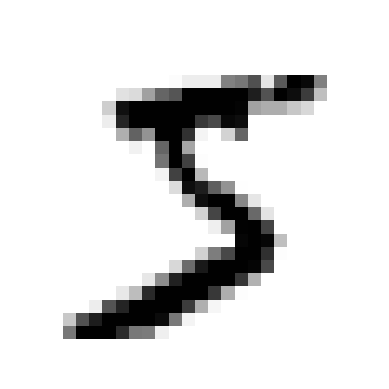

In [9]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [10]:
# It is already shuffled, which is good because this guarantees that all cross-validation folds will be similiar
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
# for now lets try to identify one digit - for example, the number 5
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [12]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
y_train_predicted = sgd_clf.predict([some_digit])
y_train_predicted

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
# mean of all scores
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy").mean()

np.float64(0.9570333333333334)

In [17]:
from sklearn.dummy import DummyClassifier

In [18]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
# any is a built-in function and return True if any instance(at least one) is True, otherwise False if each one is false
print(any(dummy_clf.predict(X_test)))
# False because the most frequent class is not 5

False


In [19]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [20]:
from sklearn.model_selection import cross_val_predict
# to avoid use predict in the test set sooner instead in the very end of the project we can use cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm
# cm[0][0] = True negative, cm[0][1] = False positive, cm[1][0] = False negative, cm[1][1] = True positive

array([[53892,   687],
       [ 1891,  3530]])

In [25]:
# A perfect classifier would only have true positives and true negatives
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [28]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) # 3530 / (3530 + 687)
print(f"{recall_score(y_train_5, y_train_pred)}: it only detects 65.1% of the 5s since recall is the score of True positive rate") # 3530 / (3530 + 1891)

0.8370879772350012
0.6511713705958311: it only detects 65.1% of the 5s since recall is the score of True positive rate


In [29]:
from sklearn.metrics import  f1_score

In [31]:
# favors classifers that have similar precision and recall.
# increasing precision reduces recall, and vice versa
print(f1_score(y_train_5, y_train_pred))

0.7325171197343847
